In [59]:
%load_ext autoreload
%autoreload
%matplotlib inline
import pandas as pd
import warnings
#from sklearn.exceptions import UndefinedMetricWarning
#warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC #, SVC
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
#import itertools
#import math
from matplotlib import style
style.use('seaborn-white')
#sns.set_context("paper")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3,"font.size":19, "axes.labelsize":19,
    "axes.titlesize":19})
#, "xtick.labelsize","ytick.labelsize", "legend.fontsize"
sns.set_color_codes()

import tl_learning as tl
import sys
sys.path.append('../')
import support_utils as sup
import tl_utils as tlut
import data_explore_utils as dex
import display_utils as dut

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Recommended NBExtensions:**
- Collapsible Headings
- Table_beautifier

In [5]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',100)

### Import Candsets

In [6]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/home/'
pattern_of_filename = 'candset_feature_(.{3,5}_.{2,4})'
sep = ','
# ***********************************************

candsets = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [7]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/home/'
pattern_of_filename = 'candset_feature_(.{3,5}_.{2,4})_train'
sep = ','
# ***********************************************

candsets_train = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [8]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/home/'
pattern_of_filename = 'candset_feature_(.{3,5}_.{2,4})_test'
sep = ','
# ***********************************************

candsets_test = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [9]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/home/'
pattern_of_filename = 'candset_(.{3,5}_.{2,4})'
sep = ','
# ***********************************************

candsets_org_attr = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [10]:
candsets_org_attr.keys()

dict_keys(['katom_rewo', 'katom_cdi', 'rewo_cdi'])

### Feature Set and Setup

In [11]:
all_feature = ['finish_lev_sim', 'finish_jac_q3_sim',
       'finish_jac_an_sim', 'finish_rel_jac_an_sim', 'finish_containment_sim',
       'finish_exact_sim', 'shape_lev_sim', 'shape_jac_q3_sim',
       'shape_jac_an_sim', 'shape_rel_jac_an_sim', 'shape_containment_sim',
       'shape_exact_sim', 'color_lev_sim', 'color_jac_q3_sim',
       'color_jac_an_sim', 'color_rel_jac_an_sim', 'color_containment_sim',
       'color_exact_sim', 'base_lev_sim', 'base_jac_q3_sim', 'base_jac_an_sim',
       'base_rel_jac_an_sim', 'base_containment_sim', 'base_exact_sim',
       'style_cosine_tfidf_sim', 'style_lev_sim', 'style_jac_q3_sim',
       'style_jac_an_sim', 'style_rel_jac_an_sim', 'style_containment_sim',
       'style_exact_sim', 'height_lev_sim', 'height_jac_q3_sim',
       'height_jac_an_sim', 'height_rel_jac_an_sim', 'height_containment_sim',
       'height_exact_sim', 'category_lev_sim', 'category_jac_q3_sim',
       'category_jac_an_sim', 'category_rel_jac_an_sim',
       'category_containment_sim', 'category_exact_sim',
       'title_cosine_tfidf_sim', 'title_lev_sim', 'title_jac_q3_sim',
       'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_containment_sim',
       'title_exact_sim', 'capacity_lev_sim', 'capacity_jac_q3_sim',
       'capacity_jac_an_sim', 'capacity_rel_jac_an_sim',
       'capacity_containment_sim', 'capacity_exact_sim', 'material_lev_sim',
       'material_jac_q3_sim', 'material_jac_an_sim', 'material_rel_jac_an_sim',
       'material_containment_sim', 'material_exact_sim', 'brand_lev_sim',
       'brand_jac_q3_sim', 'brand_jac_an_sim', 'brand_rel_jac_an_sim',
       'brand_containment_sim', 'brand_exact_sim', 'product_type_lev_sim',
       'product_type_jac_q3_sim', 'product_type_jac_an_sim',
       'product_type_rel_jac_an_sim', 'product_type_containment_sim',
       'product_type_exact_sim']

In [12]:
len(all_feature) == len(candsets['katom_cdi'].columns.drop(['ids','label']))

True

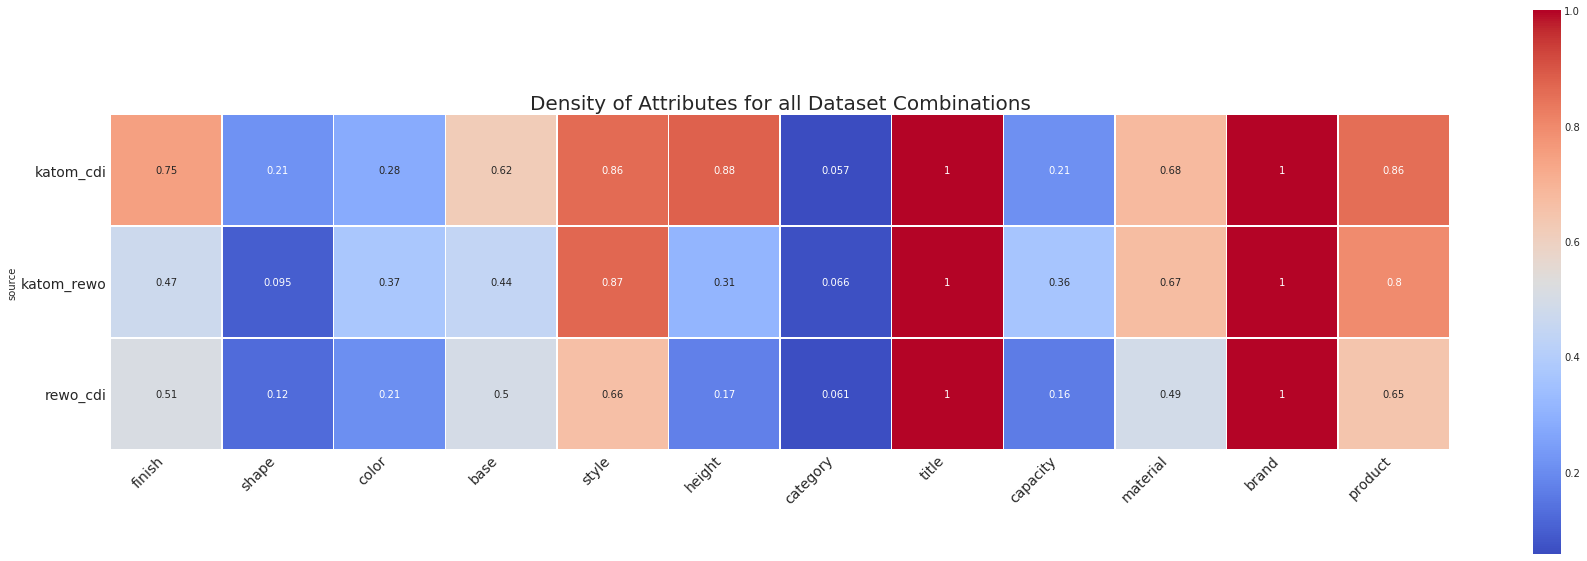

In [13]:
dex.plotDensityAttributesHeatmap(candsets)

In [14]:
# dense features for all combinations

# features excluded where the attribute has a very low density (<3%) for at 
# least one dataset that is involved either as source or target in the TL setting
rc_cdi_katom_rewo = ['finish_lev_sim', 'finish_jac_q3_sim',
       'finish_jac_an_sim', 'finish_rel_jac_an_sim', 'finish_containment_sim',
       'finish_exact_sim', 'color_lev_sim', 'color_jac_q3_sim',
       'color_jac_an_sim', 'color_rel_jac_an_sim', 'color_containment_sim',
       'color_exact_sim', 'base_lev_sim', 'base_jac_q3_sim', 'base_jac_an_sim',
       'base_rel_jac_an_sim', 'base_containment_sim', 'base_exact_sim',
       'style_cosine_tfidf_sim', 'style_lev_sim', 'style_jac_q3_sim',
       'style_jac_an_sim', 'style_rel_jac_an_sim', 'style_containment_sim',
       'style_exact_sim', 'height_lev_sim', 'height_jac_q3_sim',
       'height_jac_an_sim', 'height_rel_jac_an_sim', 'height_containment_sim',
       'height_exact_sim', 'title_cosine_tfidf_sim', 'title_lev_sim', 'title_jac_q3_sim',
       'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_containment_sim',
       'title_exact_sim', 'capacity_lev_sim', 'capacity_jac_q3_sim',
       'capacity_jac_an_sim', 'capacity_rel_jac_an_sim',
       'capacity_containment_sim', 'capacity_exact_sim', 'material_lev_sim',
       'material_jac_q3_sim', 'material_jac_an_sim', 'material_rel_jac_an_sim',
       'material_containment_sim', 'material_exact_sim', 'brand_lev_sim',
       'brand_jac_q3_sim', 'brand_jac_an_sim', 'brand_rel_jac_an_sim',
       'brand_containment_sim', 'brand_exact_sim', 'product_type_lev_sim',
       'product_type_jac_q3_sim', 'product_type_jac_an_sim',
       'product_type_rel_jac_an_sim', 'product_type_containment_sim',
       'product_type_exact_sim']

# assign the different feature sets (different dense features depending on combination)
dense_features_dict = {'cdi_katom_rewo':rc_cdi_katom_rewo}

In [15]:
# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../results/benchmarks/'
supervised_results = 'home_candsets_super_results'
unsupervised_results = 'home_candsets_unsuper_results'

# we use the same random_state for all experiments
random_state = 42
# assign which sklearn estimators to use for the TL Experiment
estimators_tl = {'logreg':LogisticRegression(random_state=random_state,solver='liblinear',max_iter=1000),
                 'dectree':DecisionTreeClassifier(random_state=random_state),
                 'randforest':RandomForestClassifier(random_state=random_state),
                 'xgb':xgb.XGBClassifier(random_state=random_state,objective="binary:logistic"),
                 'svm':LinearSVC(random_state=random_state,dual=False),
                 #'svm':SVC(random_state=random_state,kernel='linear'),
                 'logregcv':LogisticRegressionCV(random_state=random_state,cv=5,solver='liblinear',max_iter=1000)}

#### Import Supervised Results

In [16]:
candsets_super_results = sup.importJSONFileInDict(path_to_directory+supervised_results)

#### Import Unsupervised Results

In [17]:
candsets_unsuper_results = sup.importJSONFileInDict(path_to_directory+unsupervised_results)

#### Run TL Experiment (quite time-consuming, skip to import if no re-run desired)

In [162]:
# perform TL experiments and store them in dictionary
# see DocString of returnF1TLResultsFromDictWithPlot() function for more information
# tl_results = returnF1TLResultsFromDictWithPlot(candsets,estimators_tl,all_features,dense_features_dict,n=10)

# save the experiment results to JSON
# saveTLResultsToJSON(tl_results=tl_results, filename='tl_results')

In [163]:
da_weighting = None
#dense_features_dict = None
n = 10
tl_results = tl.performTLFromDict(candsets,candsets_train,candsets_test,estimators_tl,all_feature,
                                  dense_features_dict,da_weighting,n)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [174]:
sup.saveResultsToJSON(tl_results,'../../results/tl/home/home_tl_results')

Saved in ../../results/tl/home/home_tl_results.json


In [165]:
da_weighting = 'nn'
#dense_features_dict = None
n = 10
tl_results_nn = tl.performTLFromDict(candsets,candsets_train,candsets_test,estimators_tl,all_feature,
                                     dense_features_dict,da_weighting,n)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [175]:
sup.saveResultsToJSON(tl_results_nn,'../../results/tl/home/home_tl_results_nn')

Saved in ../../results/tl/home/home_tl_results_nn.json


In [ ]:
da_weighting = 'lr_predict_proba'
#dense_features_dict = None
n = 10
tl_results_lprob = tl.performTLFromDict(candsets,candsets_train,candsets_test,estimators_tl,all_feature,
                                  dense_features_dict,da_weighting,n)

In [176]:
sup.saveResultsToJSON(tl_results_lprob,'../../results/tl/home/home_tl_results_lprob')

Saved in ../../results/tl/home/home_tl_results_lprob.json


In [169]:
tl_results.keys()

dict_keys([('katom_cdi', 'rewo_cdi'), ('rewo_cdi', 'katom_cdi'), ('katom_cdi', 'katom_rewo'), ('katom_rewo', 'katom_cdi'), ('rewo_cdi', 'katom_rewo'), ('katom_rewo', 'rewo_cdi')])

In [135]:
tl_results[('katom_cdi', 'rewo_cdi')]['all']['no_weighting'].keys()

dict_keys(['logreg', 'dectree', 'randforest', 'xgb', 'svm', 'logregcv'])

In [136]:
tl_results[('katom_cdi', 'rewo_cdi')]['dense']['no_weighting'].keys()

dict_keys(['logreg', 'dectree', 'randforest', 'xgb', 'svm', 'logregcv'])

#### Import TL Results

In [26]:
tl_results = sup.importJSONFileInDict('../../results/tl/home/home_tl_results.json')
tl_results_nn = sup.importJSONFileInDict('../../results/tl/home/home_tl_results_nn.json')
tl_results_lprob = sup.importJSONFileInDict('../../results/tl/home/home_tl_results_lprob.json')

### TL Results

#### No Domain Adaptation

##### Whole Table

In [177]:
df_tl_results = tlut.createDFwithTLResults(tl_results,candsets_super_results,candsets_unsuper_results,
                           estimators_tl.keys(),['all','dense'],'no_weighting','../../results/tl/home/home_tl_results')

TL Results when doing naive Transfer (no_weighting) on all feature and only dense features


##### Table with only all_feature results

In [179]:
feature = 'all'
selected_estimtor = None
df_tl_results_all = tlut.returnDFwithTLResultsSubset(df_tl_results,candsets_unsuper_results,
                                                     feature,selected_estimtor,
                                                     filename=f'../../results/tl/home/home_tl_results_{feature}_feature')

##### Table with only dense_feature results

In [180]:
feature = 'dense'
selected_estimtor = None
df_tl_results_dense = tlut.returnDFwithTLResultsSubset(df_tl_results,candsets_unsuper_results,
                                                     feature,selected_estimtor,
                                                     filename=f'../../results/tl/home/home_tl_results_{feature}_feature')

##### Table with only dense_feature results and Random Forest as selected estimator

In [182]:
feature = 'dense'
selected_estimator = 'randforest'
df_tl_results_rf_dense = tlut.returnDFwithTLResultsSubset(df_tl_results,candsets_unsuper_results,
                                                     feature,selected_estimator,
                                                     filename=f'../../results/tl/home/home_tl_results_{selected_estimator}_{feature}_feature')

Only displaying the results of randforest using dense feature


,,TL_avg,Tar_max,Tar_exc,Tar_sup,unsuper_res
Source,Target,,,,,
katom_cdi,rewo_cdi,0.696,0.771,140,0.822,0.652
rewo_cdi,katom_cdi,0.655,0.916,10,0.904,0.648
katom_cdi,katom_rewo,0.672,0.759,70,0.810,0.196
katom_rewo,katom_cdi,0.706,0.913,24,0.904,0.648
rewo_cdi,katom_rewo,0.642,0.764,50,0.810,0.196
katom_rewo,rewo_cdi,0.546,0.766,14,0.822,0.652


____________________________________________________________

#### Nearest Neighbor-Based Weighting (https://ieeexplore.ieee.org/abstract/document/6349714)

##### Whole Table

In [183]:
df_tl_results_nn = tlut.createDFwithTLResults(tl_results_nn,candsets_super_results,candsets_unsuper_results,
                           estimators_tl.keys(),['all','dense'],'nn','../../results/tl/home/home_tl_results_nn')

TL Results when doing Transfer with domain adapted (nn) source instances on all feature and only dense features


##### Table with only all_feature results

In [184]:
feature = 'all'
selected_estimtor = None
df_tl_results_nn_all = tlut.returnDFwithTLResultsSubset(df_tl_results_nn,candsets_unsuper_results,
                                                     feature,selected_estimtor,
                                                     filename=f'../../results/tl/home/home_tl_results_nn_{feature}_feature')

##### Table with only dense_feature results

In [185]:
feature = 'dense'
selected_estimtor = None
df_tl_results_nn_dense = tlut.returnDFwithTLResultsSubset(df_tl_results_nn,candsets_unsuper_results,
                                                     feature,selected_estimtor,
                                                     filename=f'../../results/tl/home/home_tl_results_nn_{feature}_feature')

##### Table with only dense_feature results and Random Forest as selected estimator

In [186]:
feature = 'dense'
selected_estimtor = 'randforest'
df_tl_results_rf_nn_dense = tlut.returnDFwithTLResultsSubset(df_tl_results_nn,candsets_unsuper_results,
                                                     feature,selected_estimtor,
                                                     filename=f'../../results/tl/home/home_tl_results_nn_{selected_estimator}_{feature}_feature')

Only displaying the results of randforest using dense feature


,,TL_avg,Tar_max,Tar_exc,Tar_sup,unsuper_res
Source,Target,,,,,
katom_cdi,rewo_cdi,0.687,0.768,120,0.822,0.652
rewo_cdi,katom_cdi,0.718,0.910,32,0.904,0.648
katom_cdi,katom_rewo,0.673,0.762,100,0.810,0.196
katom_rewo,katom_cdi,0.667,0.916,20,0.904,0.648
rewo_cdi,katom_rewo,0.633,0.761,44,0.810,0.196
katom_rewo,rewo_cdi,0.563,0.767,14,0.822,0.652


_____________________________________________________

#### Custom Weighting based on predicted probability of Logistic Regression Model trained to discriminate between source and target samples when combining them

##### Whole Table

In [187]:
df_tl_results_lprob = tlut.createDFwithTLResults(tl_results_lprob,candsets_super_results,candsets_unsuper_results,
                           estimators_tl.keys(),['all','dense'],'lr_predict_proba','../../results/tl/home/home_tl_results_lprob')

TL Results when doing Transfer with domain adapted (lr_predict_proba) source instances on all feature and only dense features


##### Table with only all_feature results

In [188]:
feature = 'all'
selected_estimtor = None
df_tl_results_lprob_all = tlut.returnDFwithTLResultsSubset(df_tl_results_lprob,candsets_unsuper_results,
                                                     feature,selected_estimtor,
                                                     filename=f'../../results/tl/home/home_tl_results_lprob_{feature}_feature')

##### Table with only dense_feature results

In [189]:
feature = 'dense'
selected_estimtor = None
df_tl_results_lprob_dense = tlut.returnDFwithTLResultsSubset(df_tl_results_lprob,candsets_unsuper_results,
                                                     feature,selected_estimtor,
                                                     filename=f'../../results/tl/home/home_tl_results_lprob_{feature}_feature')

##### Table with only dense_feature results and Random Forest as selected estimator

In [190]:
feature = 'dense'
selected_estimtor = 'randforest'
df_tl_results_rf_lprob_dense = tlut.returnDFwithTLResultsSubset(df_tl_results_lprob,candsets_unsuper_results,
                                                     feature,selected_estimtor,
                                                     filename=f'../../results/tl/home/home_tl_results_lprob_{selected_estimator}_{feature}_feature')

Only displaying the results of randforest using dense feature


,,TL_avg,Tar_max,Tar_exc,Tar_sup,unsuper_res
Source,Target,,,,,
katom_cdi,rewo_cdi,0.676,0.768,90,0.822,0.652
rewo_cdi,katom_cdi,0.767,0.914,38,0.904,0.648
katom_cdi,katom_rewo,0.664,0.766,90,0.810,0.196
katom_rewo,katom_cdi,0.679,0.917,20,0.904,0.648
rewo_cdi,katom_rewo,0.642,0.763,44,0.810,0.196
katom_rewo,rewo_cdi,0.534,0.767,-,0.822,0.652


## Plots

In [202]:
tl_results[('katom_cdi', 'rewo_cdi')]['all'].keys()

dict_keys(['no_weighting'])

In [203]:
tl_results_nn[('katom_cdi', 'rewo_cdi')]['all'].keys()

dict_keys(['nn'])

In [204]:
import copy

In [205]:
tl_results_all = copy.deepcopy(tl_results)

In [206]:
for key in tl_results_all:
    for feature in tl_results_all[key]:
        tl_results_all[key][feature].update(tl_results_nn[key][feature])
        tl_results_all[key][feature].update(tl_results_lprob[key][feature])

### Transfer from Katom_cdi to Rewo_cdi

In [28]:
tl_results['katom_cdi_rewo_cdi']['dense'].keys()

dict_keys(['no_weighting'])

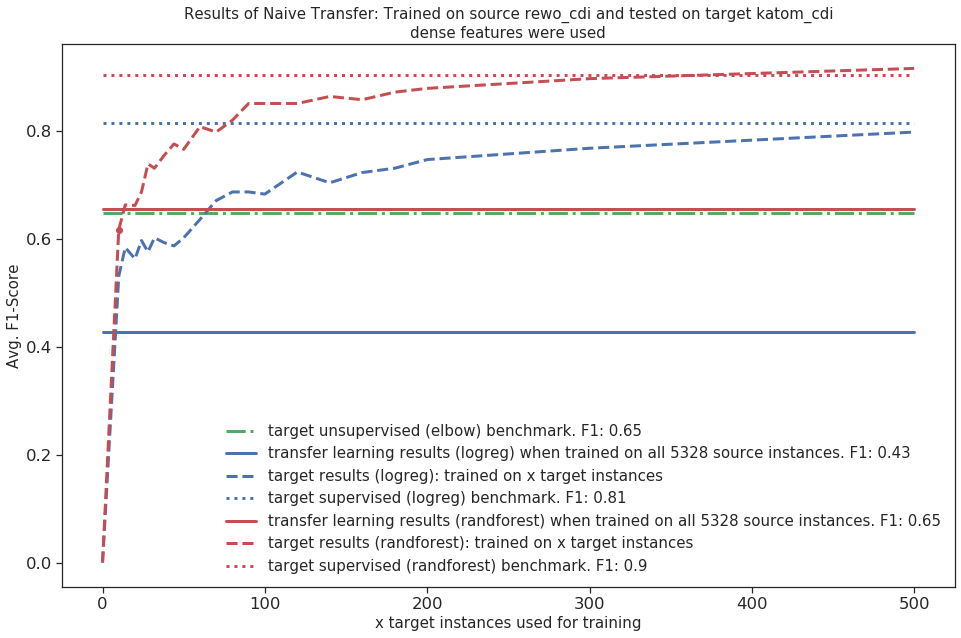

In [58]:
source_name = 'rewo_cdi'
target_name = 'katom_cdi'
feature = 'dense'
selected_estimators = ['logreg','randforest']
selected_da_weighting = ['no_weighting']
plot_target = True

dut.plotTLResults(tl_results,source_name,target_name,feature,selected_estimators,selected_da_weighting,
                  candsets,candsets_super_results,candsets_unsuper_results,plot_target,info_text=False,
                  path_for_output='../../results/graphics/home_rewo_cdi_katom_cdi_lr_rf')